In [ ]:
pip install joblib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib 
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#data loaded and ready to go 
diabetes_dataset = pd.read_csv(io.BytesIO(uploaded["diabetes.csv"]))
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [ ]:
#explooring data (cleaning data is necessary)
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


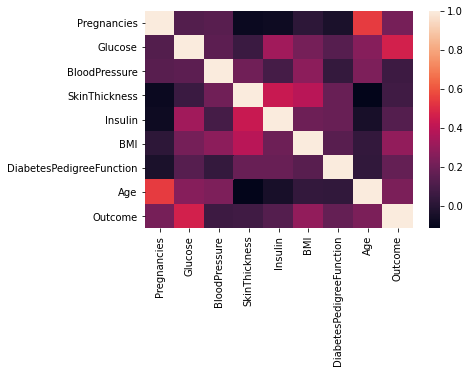

In [ ]:
corr = diabetes_dataset.corr()
print(corr)
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns)

Divide dataset into train and datset

In [ ]:
x = diabetes_dataset[["Glucose"]]
y = diabetes_dataset[["Outcome"]]

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [ ]:
x_train.shape

(537, 1)

In [ ]:
y_train.shape

(537, 1)

fill the data

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,10), solver ="lbfgs", alpha=1e-5)

In [ ]:
clf.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(x_train)
y_pred[1]

0

In [ ]:
print(accuracy_score(y_train, y_pred) * 100, "%" )

65.92178770949721 %


In [ ]:
from sklearn.metrics import accuracy_score
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       354
           1       0.00      0.00      0.00       183

    accuracy                           0.66       537
   macro avg       0.33      0.50      0.40       537
weighted avg       0.43      0.66      0.52       537



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))

[[354   0]
 [183   0]]


In [ ]:
a = clf.predict(([[0]]))

In [ ]:
if a == 0:
  print("Your are diabetes free")
else:
  print("You have diabetic , concern to doctor")

Your are diabetes free


In [ ]:
#splitting data into testing training and checking sets
#dfTrain = diabetes_dataset[:650]
#dfTest = diabetes_dataset[650:750]
#dfCheck = diabetes_dataset[750:]

In [ ]:
#seperating labels and Features
#trainLabel = np.asarray(dfTrain['Outcome'])
#trainData = np.asarray(dfTrain.drop('Outcome',1))
#testLabel = np.asarray(dfTest['Outcome'])
#testData = np.asarray(dfTest.drop('Outcome',1))

In [ ]:
#normalisation
#means = np.mean(trainData, axis = 0)
#std = np.std(trainData, axis = 0)

#trainData = (trainData - means)/ std
#testData  = (trainData - means)/ std

#np.mean(trainData, axis = 0)
#np.std(trainData, axis = 0)

In [ ]:
#DiabetesCheck = LogisticRegression()
#DiabetesCheck.fit(trainData, trainLabel)
#accuracy = DiabetesCheck.score(trainData, trainLabel)
#print("accuracy", accuracy * 100, "%")

In [ ]:
#interpretating data
#coeff = list(DiabetesCheck.coef_[0])
#labels = list(trainData.columns)
#features = pd.DataFrame()
#labels = features["Features"] 
#coeff = features["Importance"]
#features.sort_value(by = ["Importance"], ascending = True, inplace = True)
#features["Positive"] = features["Importance"] > 0
##features.importance.plot(kind = "barh", figsize = (11,6), color = features.positive.map({True : "Blue", False : "Black"}))
#plt.xlabel("Importance")

In [ ]:
#Saving model
#joblib.dump([DiabetesCheck, means, std], "diabetesModel.pkl")
#DiabetesLoadedModel, means, std = joblib.load("diabetesModel.pkl")
#accuracyModel = DiabetesLoadedModel.score(testData, testLabel)
#print("Accuracy = ", accuracyModel * 100, "%")

In [ ]:
#print(dfCheck.head())